In [1]:
# import libraries
import pandas as pd                      # for data wrangling
import geopandas as gpd                  # for analyzing spatial data
import contextily as ctx                 # for base maps
import matplotlib.pyplot as plt          # for plotting data
import plotly.express as px              # for interactive plots
import folium   # for interactive maps

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# import median household income geojson data from censusreporter
hhinc = gpd.read_file('acs2019_5yr_B19013_14000US06037222001.geojson')

In [3]:
# rename columns
hhinc.columns = ['geoid', 'name', 'Median Household Income', 'Margin of Error', 'geometry']
hhinc.tail()

geoid                                   name  \
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA   
1004      16000US0644000                        Los Angeles, CA   

      Median Household Income  Margin of Error  \
1000                      NaN              NaN   
1001                      NaN              NaN   
1002                      NaN              NaN   
1003                      NaN              NaN   
1004                  62142.0            452.0   

                                               geometry  
1000  MULTIPOLYGON (((-118.35173 34.28034, -118.3517...  
1001  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
1002  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
1003  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...  
1004  MULTIPOLYGON (((-118.66818 34.18987, -118.6681...

In [4]:
# drop LA city row
hhinc = hhinc.drop([1004])
hhinc.tail()

geoid                                   name  \
999   14000US06037980024  Census Tract 9800.24, Los Angeles, CA   
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA   

      Median Household Income  Margin of Error  \
999                  150250.0          13582.0   
1000                      NaN              NaN   
1001                      NaN              NaN   
1002                      NaN              NaN   
1003                      NaN              NaN   

                                               geometry  
999   MULTIPOLYGON (((-118.51849 34.18389, -118.5184...  
1000  MULTIPOLYGON (((-118.35173 34.28034, -118.3517...  
1001  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
1002  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
1003  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...

In [6]:
# reproject census data
hhinc_mercator = hhinc.to_crs(epsg=3857)

In [7]:
# import parks data 
parks = gpd.read_file("https://data.lacity.org/api/geospatial/rwq7-yhp5?method=export&format=GeoJSON")

In [8]:
# reproject parks data
parks_mercator = parks.to_crs(epsg=3857)

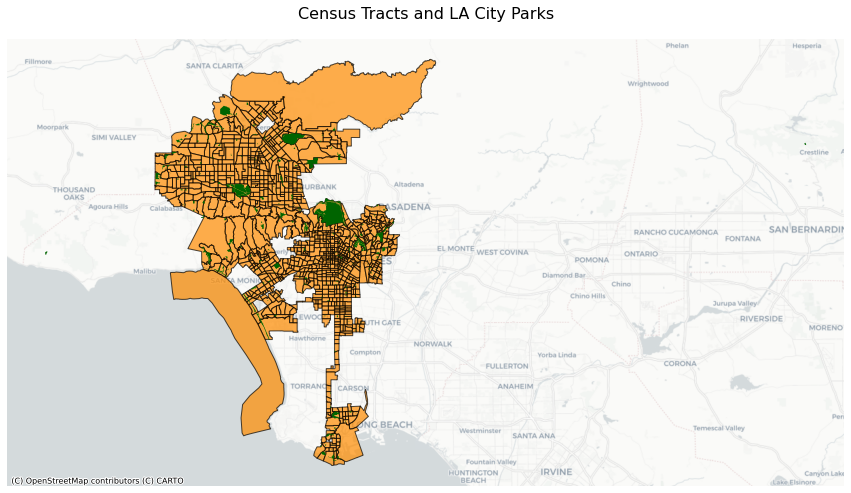

In [9]:
#basic plot of parks and census tracts

fig, ax = plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
hhinc_mercator.plot(ax=ax,
                color="darkorange",
                alpha=0.7,
                edgecolor="black"
               )
# add the layer with ax=ax in the argument 
parks_mercator.plot(ax=ax,
                    color="darkgreen",
                    alpha=1
                   )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts and LA City Parks',fontsize=16,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

In [10]:
# clip census data to parks
parks_clip = gpd.clip(hhinc_mercator, parks_mercator, keep_geom_type=True)

In [11]:
# look at clipped data frame
parks_clip.head()

geoid                                   name  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA   
5  14000US06037101400     Census Tract 1014, Los Angeles, CA   
6  14000US06037102103  Census Tract 1021.03, Los Angeles, CA   

   Median Household Income  Margin of Error  \
0                  63534.0          16806.0   
1                  90389.0           9796.0   
2                  44083.0           9483.0   
5                  75139.0          27397.0   
6                  76833.0           8001.0   

                                            geometry  
0  MULTIPOLYGON (((-13169128.200 4063438.817, -13...  
1  POLYGON ((-13168279.678 4066303.410, -13168075...  
2  POLYGON ((-13167745.920 4062780.577, -13167739...  
5  MULTIPOLYGON (((-13168967.832 4062380.182, -13...  
6  POLYGON ((-13173990.145 4059225.714, -13173921...

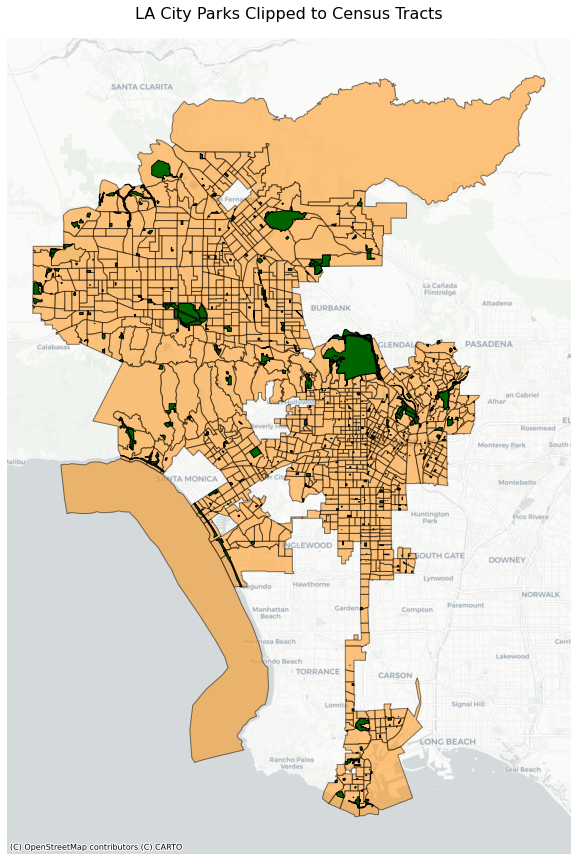

In [12]:
#plot with parks clipped to census tracts laid over census tracts

fig, ax = plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
hhinc_mercator.plot(ax=ax,
                color="darkorange",
                alpha=0.5,
                edgecolor="black"
               )

# add the layer with ax=ax in the argument 
parks_clip.plot(ax=ax,
                color="darkgreen",
                alpha=1,
                edgecolor="black"
               )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('LA City Parks Clipped to Census Tracts',fontsize=16,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

In [13]:
# import LA city by neighborhood data
nhcity = gpd.read_file("https://s3-us-west-2.amazonaws.com/mappingla.com/downloads/neighborhoods/la_city.json")

In [14]:
# import LA county by neighborhood data
nhcounty = gpd.read_file("https://usc.data.socrata.com/api/geospatial/r8qd-yxsr?method=export&format=GeoJSON")

In [15]:
# reproject LA city neighborhood data
nhcity_mercator = nhcity.to_crs(epsg=3857)

In [16]:
# reproject LA county neighborhood data
nhcounty_mercator = nhcounty.to_crs(epsg=3857)

In [18]:
# tried to clip county data by city boundaries and get an error
nh_clip = gpd.clip(nhcounty_mercator, nhcity_mercator, keep_geom_type=True)

GEOSException: TopologyException: Input geom 0 is invalid: Nested shells at -13153976.34760474 4005687.7331714225

In [22]:
# new strategy: cut county data by only including neighborhoods in city neighborhood data
nhcity.head()

name                   slug  \
0         Adams-Normandie        adams-normandie   
1                  Arleta                 arleta   
2       Arlington Heights      arlington-heights   
3         Atwater Village        atwater-village   
4  Baldwin Hills/Crenshaw  baldwin-hillscrenshaw   

                                            geometry  
0  MULTIPOLYGON (((-118.30901 34.03741, -118.3057...  
1  MULTIPOLYGON (((-118.42202 34.22410, -118.4228...  
2  MULTIPOLYGON (((-118.31591 34.05261, -118.3155...  
3  MULTIPOLYGON (((-118.27832 34.15301, -118.2783...  
4  MULTIPOLYGON (((-118.35626 34.02484, -118.3550...

In [24]:
# list all neighborhoods by 'slug' and create as new variable
nhcity_list = nhcity['slug'].to_list()
nhcity_list

['adams-normandie',
 'arleta',
 'arlington-heights',
 'atwater-village',
 'baldwin-hillscrenshaw',
 'bel-air',
 'beverly-crest',
 'beverly-grove',
 'beverlywood',
 'boyle-heights',
 'brentwood',
 'broadway-manchester',
 'canoga-park',
 'carthay',
 'central-alameda',
 'century-city',
 'chatsworth',
 'chatsworth-reservoir',
 'chesterfield-square',
 'cheviot-hills',
 'chinatown',
 'cypress-park',
 'del-rey',
 'downtown',
 'eagle-rock',
 'east-hollywood',
 'echo-park',
 'el-sereno',
 'elysian-park',
 'elysian-valley',
 'encino',
 'exposition-park',
 'fairfax',
 'florence',
 'glassell-park',
 'gramercy-park',
 'granada-hills',
 'green-meadows',
 'griffith-park',
 'hancock-park',
 'hansen-dam',
 'harbor-city',
 'harbor-gateway',
 'harvard-heights',
 'harvard-park',
 'highland-park',
 'historic-south-central',
 'hollywood',
 'hollywood-hills',
 'hollywood-hills-west',
 'hyde-park',
 'jefferson-park',
 'koreatown',
 'lake-balboa',
 'lake-view-terrace',
 'larchmont',
 'leimert-park',
 'lincoln-

In [33]:
# use loc command to create new dataframe of county data that only includes neighborhoods in the city data
new_nhcounty_mercator = nhcounty_mercator.loc[nhcounty_mercator['slug'].isin(['adams-normandie','arleta','arlington-heights','atwater-village',
 'baldwin-hillscrenshaw',
 'bel-air',
 'beverly-crest',
 'beverly-grove',
 'beverlywood',
 'boyle-heights',
 'brentwood',
 'broadway-manchester',
 'canoga-park',
 'carthay',
 'central-alameda',
 'century-city',
 'chatsworth',
 'chatsworth-reservoir',
 'chesterfield-square',
 'cheviot-hills',
 'chinatown',
 'cypress-park',
 'del-rey',
 'downtown',
 'eagle-rock',
 'east-hollywood',
 'echo-park',
 'el-sereno',
 'elysian-park',
 'elysian-valley',
 'encino',
 'exposition-park',
 'fairfax',
 'florence',
 'glassell-park',
 'gramercy-park',
 'granada-hills',
 'green-meadows',
 'griffith-park',
 'hancock-park',
 'hansen-dam',
 'harbor-city',
 'harbor-gateway',
 'harvard-heights',
 'harvard-park',
 'highland-park',
 'historic-south-central',
 'hollywood',
 'hollywood-hills',
 'hollywood-hills-west',
 'hyde-park',
 'jefferson-park',
 'koreatown',
 'lake-balboa',
 'lake-view-terrace',
 'larchmont',
 'leimert-park',
 'lincoln-heights',
 'los-feliz',
 'manchester-square',
 'mar-vista',
 'mid-city',
 'mid-wilshire',
 'mission-hills',
 'montecito-heights',
 'mount-washington',
 'north-hills',
 'north-hollywood',
 'northridge',
 'pacific-palisades',
 'pacoima',
 'palms',
 'panorama-city',
 'pico-robertson',
 'pico-union',
 'playa-del-rey',
 'playa-vista',
 'porter-ranch',
 'rancho-park',
 'reseda',
 'san-pedro',
 'sawtelle',
 'sepulveda-basin',
 'shadow-hills',
 'sherman-oaks',
 'silver-lake',
 'south-park',
 'studio-city',
 'sunland',
 'sun-valley',
 'sylmar',
 'tarzana',
 'toluca-lake',
 'tujunga',
 'university-park',
 'valley-glen',
 'valley-village',
 'van-nuys',
 'venice',
 'vermont-knolls',
 'vermont-slauson',
 'vermont-square',
 'vermont-vista',
 'watts',
 'west-adams',
 'westchester',
 'west-hills',
 'westlake',
 'west-los-angeles',
 'westwood',
 'wilmington',
 'windsor-square',
 'winnetka',
 'woodland-hills'])]

<AxesSubplot:>

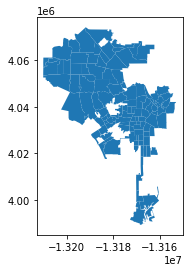

In [34]:
# check to make sure it looks like LA
new_nhcounty_mercator.plot()

In [35]:
# clip neighborhood data to parks
nhparks_clip = gpd.clip(new_nhcounty_mercator, parks_mercator, keep_geom_type=True)

In [36]:
# look at clipped data frame
nhparks_clip.head()

external_i               name  \
1     adams-normandie    Adams-Normandie   
10             arleta             Arleta   
11  arlington-heights  Arlington Heights   
13    atwater-village    Atwater Village   
17    vermont-slauson    Vermont-Slauson   

                                         location             latitude slug_1  \
1   POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   
10         POINT(34.243099999121583 -118.4307575)         -118.4307575   None   
11          POINT(34.04491049912405 -118.3234085)         -118.3234085   None   
13  POINT(34.131066356759177 -118.26237347966236)  -118.26237347966236   None   
17  POINT(33.983913999124709 -118.29035750000011)  -118.29035750000011   None   

              sqmi                                         display_na  \
1   0.805350187789  Adams-Normandie L.A. County Neighborhood (Curr...   
10   3.09617917557          Arleta L.A. County Neighborhood (Current)   
11   1.03141523527  Arlington Heights L.A. County Neighborhood (Cu...   
13   1.77689394489  Atwater Village L.A. County Neighborhood (Curr...   
17   1.44245256524  Vermont-Slauson L.A. County Neighborhood (Curr...   

                                    set               slug  \
1   L.A. County Neighborhoods (Current)    adams-normandie   
10  L.A. County Neighborhoods (Current)             arleta   
11  L.A. County Neighborhoods (Current)  arlington-heights   
13  L.A. County Neighborhoods (Current)    atwater-village   
17  L.A. County Neighborhoods (Current)    vermont-slauson   

             longitude name_1                                kind  \
1   34.031461499124156   None  L.A. County Neighborhood (Current)   
10  34.243099999121583   None  L.A. County Neighborhood (Current)   
11   34.04491049912405   None  L.A. County Neighborhood (Current)   
13  34.131066356759177   None  L.A. County Neighborhood (Current)   
17  33.983913999124709   None  L.A. County Neighborhood (Current)   

                 type                                           geometry  
1   segment-of-a-city  MULTIPOLYGON (((-13169533.953 4032883.134, -13...  
10  segment-of-a-city  MULTIPOLYGON (((-13182796.511 4060204.512, -13...  
11  segment-of-a-city  MULTIPOLYGON (((-13172275.170 4034176.066, -13...  
13  segment-of-a-city  MULTIPOLYGON (((-13165799.570 4045104.115, -13...  
17  segment-of-a-city  MULTIPOLYGON (((-13167671.386 4025526.134, -13...

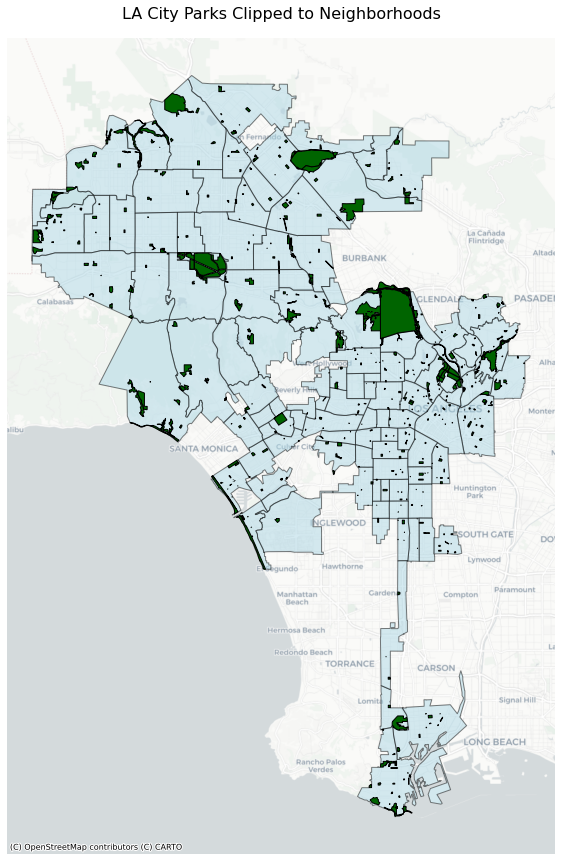

In [38]:
#plot with parks clipped to neighborhoods over neighborhoods

fig, ax = plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
new_nhcounty_mercator.plot(ax=ax,
                color="lightblue",
                alpha=0.5,
                edgecolor="black"
               )

# add the layer with ax=ax in the argument 
nhparks_clip.plot(ax=ax,
                color="darkgreen",
                alpha=1,
                edgecolor="black"
               )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('LA City Parks Clipped to Neighborhoods',fontsize=16,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

In [42]:
#testing out order 
reverse_parksnh_clip = gpd.clip(parks_mercator, new_nhcounty_mercator, keep_geom_type=True)

In [44]:
reverse_parksnh_clip.head()

name     shape_area objectid park_id  \
0  Robert F Kennedy Inspiration Memorial Park  6501.37488025        1    1056   
1                         Sycamore Grove Park  691462.199493        2     736   
2                      San Pedro Welcome Park  17402.1579777        3     328   
3                  Country Club Heritage Park  3647.84860118        4    1045   
4                     Watts Cultural Crescent  128793.355722        5    1046   

                          name_alpha     shape_leng       area_acres  \
0  ROBERT F KENNEDY PARK (LAUSD) JUA   641.47054538   0.149251627315   
1                SYCAMORE GROVE PARK   6227.3991903    15.8738513625   
2             SAN PEDRO WELCOME PARK  560.372862441   0.399500174163   
3   COUNTRY CLUB PARK HERITAGE PLAZA  287.523337381  0.0837434158085   
4            WATTS CULTURAL CRESCENT  2852.11033344    2.95670043382   

  issubpark region                           address  \
0         N      M    3400 W Wilshire Blvd, LA 90010   
1         N      M      4702 N Figueroa St, LA 90042   
2         N      P  451 N Gaffey St, San Pedro 90731   
3         N      M        1015 S Wilton Pl, LA 90018   
4         N      P   1780 E Santa Ana Blvd, LA 90002   

                                          name_publi park_class cd_real  \
0  Kennedy (Robert F) Inspiration Memorial Park (...          N      10   
1                                Sycamore Grove Park          C      01   
2                              Formerly Welcome Park          N      15   
3                              AKA Wilton Place Park          N      10   
4                  AKA Watts Towers Cultural Cresent          N      15   

                                            geometry  
0  POLYGON ((-13168758.184 4037079.620, -13168758...  
1  POLYGON ((-13158086.106 4042389.783, -13158073...  
2  POLYGON ((-13168300.614 3994761.287, -13168294...  
3  POLYGON ((-13170762.690 4035838.520, -13170762...  
4  POLYGON ((-13162666.621 4020677.766, -13162671...

In [51]:
# join neighborhood data and parks data into one dataframe
nhparks_joined = gpd.sjoin(new_nhcounty_mercator, reverse_parksnh_clip)

In [52]:
# look at the dataframe
nhparks_joined

external_i          name_left  \
1      adams-normandie    Adams-Normandie   
1      adams-normandie    Adams-Normandie   
10              arleta             Arleta   
10              arleta             Arleta   
11   arlington-heights  Arlington Heights   
..                 ...                ...   
271     woodland-hills     Woodland Hills   
271     woodland-hills     Woodland Hills   
271     woodland-hills     Woodland Hills   
271     woodland-hills     Woodland Hills   
271     woodland-hills     Woodland Hills   

                                          location             latitude  \
1    POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   
1    POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   
10          POINT(34.243099999121583 -118.4307575)         -118.4307575   
10          POINT(34.243099999121583 -118.4307575)         -118.4307575   
11           POINT(34.04491049912405 -118.3234085)         -118.3234085   
..                                             ...                  ...   
271  POINT(34.159408692550485 -118.61521650000006)  -118.61521650000006   
271  POINT(34.159408692550485 -118.61521650000006)  -118.61521650000006   
271  POINT(34.159408692550485 -118.61521650000006)  -118.61521650000006   
271  POINT(34.159408692550485 -118.61521650000006)  -118.61521650000006   
271  POINT(34.159408692550485 -118.61521650000006)  -118.61521650000006   

    slug_1            sqmi                                         display_na  \
1     None  0.805350187789  Adams-Normandie L.A. County Neighborhood (Curr...   
1     None  0.805350187789  Adams-Normandie L.A. County Neighborhood (Curr...   
10    None   3.09617917557          Arleta L.A. County Neighborhood (Current)   
10    None   3.09617917557          Arleta L.A. County Neighborhood (Current)   
11    None   1.03141523527  Arlington Heights L.A. County Neighborhood (Cu...   
..     ...             ...                                                ...   
271   None    14.768309648  Woodland Hills L.A. County Neighborhood (Current)   
271   None    14.768309648  Woodland Hills L.A. County Neighborhood (Current)   
271   None    14.768309648  Woodland Hills L.A. County Neighborhood (Current)   
271   None    14.768309648  Woodland Hills L.A. County Neighborhood (Current)   
271   None    14.768309648  Woodland Hills L.A. County Neighborhood (Current)   

                                     set               slug  \
1    L.A. County Neighborhoods (Current)    adams-normandie   
1    L.A. County Neighborhoods (Current)    adams-normandie   
10   L.A. County Neighborhoods (Current)             arleta   
10   L.A. County Neighborhoods (Current)             arleta   
11   L.A. County Neighborhoods (Current)  arlington-heights   
..                                   ...                ...   
271  L.A. County Neighborhoods (Current)     woodland-hills   
271  L.A. County Neighborhoods (Current)     woodland-hills   
271  L.A. County Neighborhoods (Current)     woodland-hills   
271  L.A. County Neighborhoods (Current)     woodland-hills   
271  L.A. County Neighborhoods (Current)     woodland-hills   

              longitude  ... park_id                        name_alpha  \
1    34.031461499124156  ...     380            RICHARDSON FAMILY PARK   
1    34.031461499124156  ...     378    LOREN MILLER RECREATION CENTER   
10   34.243099999121583  ...     553            DEVONSHIRE/ARLETA PARK   
10   34.243099999121583  ...     801                     BRANFORD PARK   
11    34.04491049912405  ...     300     WASHINGTON IRVING POCKET PARK   
..                  ...  ...     ...                               ...   
271  34.159408692550485  ...     500               ALIZONDO DRIVE PARK   
271  34.159408692550485  ...     519              SERRANIA AVENUE PARK   
271  34.159408692550485  ...     888     COSTANSO FIRE STATION 84 PARK   
271  34.159408692550485  ...     527  WOODLAND HILLS RECREATION CENTER   
271  34.159408692550485  .

In [53]:
# look at types 
nhparks_joined.dtypes

external_i       object
name_left        object
location         object
latitude         object
slug_1           object
sqmi             object
display_na       object
set              object
slug             object
longitude        object
name_1           object
kind             object
type             object
geometry       geometry
index_right       int64
name_right       object
shape_area       object
objectid         object
park_id          object
name_alpha       object
shape_leng       object
area_acres       object
issubpark        object
region           object
address          object
name_publi       object
park_class       object
cd_real          object
dtype: object

In [54]:
# change area measures to floats so we can do math on them
nhparks_joined["sqmi"] = nhparks_joined.sqmi.astype(float)
nhparks_joined["area_acres"] = nhparks_joined.area_acres.astype(float)

In [56]:
# check again
nhparks_joined.dtypes

external_i       object
name_left        object
location         object
latitude         object
slug_1           object
sqmi            float64
display_na       object
set              object
slug             object
longitude        object
name_1           object
kind             object
type             object
geometry       geometry
index_right       int64
name_right       object
shape_area       object
objectid         object
park_id          object
name_alpha       object
shape_leng       object
area_acres      float64
issubpark        object
region           object
address          object
name_publi       object
park_class       object
cd_real          object
dtype: object

In [58]:
# do calculation to convert acres into square mmiles
nhparks_joined["park area sq mi"] = nhparks_joined["area_acres"]/640
nhparks_joined.head()

external_i          name_left  \
1     adams-normandie    Adams-Normandie   
1     adams-normandie    Adams-Normandie   
10             arleta             Arleta   
10             arleta             Arleta   
11  arlington-heights  Arlington Heights   

                                         location             latitude slug_1  \
1   POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   
1   POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   
10         POINT(34.243099999121583 -118.4307575)         -118.4307575   None   
10         POINT(34.243099999121583 -118.4307575)         -118.4307575   None   
11          POINT(34.04491049912405 -118.3234085)         -118.3234085   None   

        sqmi                                         display_na  \
1   0.805350  Adams-Normandie L.A. County Neighborhood (Curr...   
1   0.805350  Adams-Normandie L.A. County Neighborhood (Curr...   
10  3.096179          Arleta L.A. County Neighborhood (Current)   
10  3.096179          Arleta L.A. County Neighborhood (Current)   
11  1.031415  Arlington Heights L.A. County Neighborhood (Cu...   

                                    set               slug  \
1   L.A. County Neighborhoods (Current)    adams-normandie   
1   L.A. County Neighborhoods (Current)    adams-normandie   
10  L.A. County Neighborhoods (Current)             arleta   
10  L.A. County Neighborhoods (Current)             arleta   
11  L.A. County Neighborhoods (Current)  arlington-heights   

             longitude  ...                      name_alpha     shape_leng  \
1   34.031461499124156  ...          RICHARDSON FAMILY PARK  480.010822275   
1   34.031461499124156  ...  LOREN MILLER RECREATION CENTER  1309.61189248   
10  34.243099999121583  ...          DEVONSHIRE/ARLETA PARK  1787.71784568   
10  34.243099999121583  ...                   BRANFORD PARK   3056.3582311   
11   34.04491049912405  ...   WASHINGTON IRVING POCKET PARK  324.212870664   

   area_acres issubpark  region                                address  \
1    0.321412         N       P           2700 S Budlong Ave, LA 90007   
1    2.415797         N       P          2717 S Halldale Ave, LA 90018   
10   1.822642         N       V  14215 W Devonshire Ave, Pacoima 91331   
10  13.376374         N       V      13310 W Branford St, Arleta 91331   
11   0.126438         N       M       4103 W Washington Blvd, LA 90018   

                                           name_publi park_class cd_real  \
1               Elinor And Don Richardson Family Park          N      08   
1                    Miller (Loren) Recreation Center          C      08   
10                             Devonshire Arleta Park          N      06   
10  Branford Recreation Center, Branford Community...          C      06   
11                                               None          N      10   

   park area sq mi  
1         0.000502  
1         0.003775  
10        0.002848  
10        0.020901  
11        0.000198  

[5 rows x 29 columns]

In [64]:
# create new list of neighborhoods
nhlist = nhparks_joined['external_i'].to_list()
nhlist

['adams-normandie',
 'adams-normandie',
 'arleta',
 'arleta',
 'arlington-heights',
 'arlington-heights',
 'atwater-village',
 'atwater-village',
 'atwater-village',
 'atwater-village',
 'atwater-village',
 'atwater-village',
 'griffith-park',
 'hollywood-hills',
 'los-feliz',
 'vermont-slauson',
 'vermont-slauson',
 'vermont-slauson',
 'vermont-slauson',
 'baldwin-hillscrenshaw',
 'baldwin-hillscrenshaw',
 'baldwin-hillscrenshaw',
 'baldwin-hillscrenshaw',
 'beverly-crest',
 'beverly-crest',
 'beverly-crest',
 'beverly-crest',
 'beverly-grove',
 'koreatown',
 'koreatown',
 'koreatown',
 'koreatown',
 'koreatown',
 'koreatown',
 'east-hollywood',
 'beverlywood',
 'cheviot-hills',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boyle-heights',
 'boy

In [65]:
# manually creating new variable for one neighborhood to be able to calculate park as a percentage of area
nhparks_adams = nhparks_joined.loc[nhparks_joined['external_i'] == 'adams-normandie']
nhparks_adams

external_i        name_left  \
1  adams-normandie  Adams-Normandie   
1  adams-normandie  Adams-Normandie   

                                        location             latitude slug_1  \
1  POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   
1  POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   

      sqmi                                         display_na  \
1  0.80535  Adams-Normandie L.A. County Neighborhood (Curr...   
1  0.80535  Adams-Normandie L.A. County Neighborhood (Curr...   

                                   set             slug           longitude  \
1  L.A. County Neighborhoods (Current)  adams-normandie  34.031461499124156   
1  L.A. County Neighborhoods (Current)  adams-normandie  34.031461499124156   

   ...                      name_alpha     shape_leng area_acres issubpark  \
1  ...          RICHARDSON FAMILY PARK  480.010822275   0.321412         N   
1  ...  LOREN MILLER RECREATION CENTER  1309.61189248   2.415797         N   

   region                        address  \
1       P   2700 S Budlong Ave, LA 90007   
1       P  2717 S Halldale Ave, LA 90018   

                              name_publi park_class cd_real park area sq mi  
1  Elinor And Don Richardson Family Park          N      08        0.000502  
1       Miller (Loren) Recreation Center          C      08        0.003775  

[2 rows x 29 columns]

In [68]:
# creating a new column to add together parks area to find total park area in neighborhood
nhparks_adams['total park area sq mi'] = nhparks_adams['park area sq mi'].sum()
nhparks_adams

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


external_i        name_left  \
1  adams-normandie  Adams-Normandie   
1  adams-normandie  Adams-Normandie   

                                        location             latitude slug_1  \
1  POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   
1  POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   

      sqmi                                         display_na  \
1  0.80535  Adams-Normandie L.A. County Neighborhood (Curr...   
1  0.80535  Adams-Normandie L.A. County Neighborhood (Curr...   

                                   set             slug           longitude  \
1  L.A. County Neighborhoods (Current)  adams-normandie  34.031461499124156   
1  L.A. County Neighborhoods (Current)  adams-normandie  34.031461499124156   

   ...     shape_leng area_acres issubpark region  \
1  ...  480.010822275   0.321412         N      P   
1  ...  1309.61189248   2.415797         N      P   

                         address                             name_publi  \
1   2700 S Budlong Ave, LA 90007  Elinor And Don Richardson Family Park   
1  2717 S Halldale Ave, LA 90018       Miller (Loren) Recreation Center   

  park_class cd_real park area sq mi total park area sq mi  
1          N      08        0.000502              0.004277  
1          C      08        0.003775              0.004277  

[2 rows x 30 columns]

In [71]:
# create a new column that calculates what percent of the neighborhood is park space
nhparks_adams['percentage of park space in neighborhood area'] = nhparks_adams['total park area sq mi']/nhparks_adams['sqmi'] * 100
nhparks_adams

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


external_i        name_left  \
1  adams-normandie  Adams-Normandie   
1  adams-normandie  Adams-Normandie   

                                        location             latitude slug_1  \
1  POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   
1  POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   

      sqmi                                         display_na  \
1  0.80535  Adams-Normandie L.A. County Neighborhood (Curr...   
1  0.80535  Adams-Normandie L.A. County Neighborhood (Curr...   

                                   set             slug           longitude  \
1  L.A. County Neighborhoods (Current)  adams-normandie  34.031461499124156   
1  L.A. County Neighborhoods (Current)  adams-normandie  34.031461499124156   

   ... area_acres issubpark region                        address  \
1  ...   0.321412         N      P   2700 S Budlong Ave, LA 90007   
1  ...   2.415797         N      P  2717 S Halldale Ave, LA 90018   

                              name_publi park_class cd_real park area sq mi  \
1  Elinor And Don Richardson Family Park          N      08        0.000502   
1       Miller (Loren) Recreation Center          C      08        0.003775   

  total park area sq mi percentage of park space in neighborhood area  
1              0.004277                                       0.53106  
1              0.004277                                       0.53106  

[2 rows x 31 columns]

In [72]:
# trying group command I found online
var = nhparks_joined.groupby('external_i')

In [73]:
var.get_group('adams-normandie')

external_i        name_left  \
1  adams-normandie  Adams-Normandie   
1  adams-normandie  Adams-Normandie   

                                        location             latitude slug_1  \
1  POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   
1  POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   

      sqmi                                         display_na  \
1  0.80535  Adams-Normandie L.A. County Neighborhood (Curr...   
1  0.80535  Adams-Normandie L.A. County Neighborhood (Curr...   

                                   set             slug           longitude  \
1  L.A. County Neighborhoods (Current)  adams-normandie  34.031461499124156   
1  L.A. County Neighborhoods (Current)  adams-normandie  34.031461499124156   

   ...                      name_alpha     shape_leng area_acres issubpark  \
1  ...          RICHARDSON FAMILY PARK  480.010822275   0.321412         N   
1  ...  LOREN MILLER RECREATION CENTER  1309.61189248   2.415797         N   

   region                        address  \
1       P   2700 S Budlong Ave, LA 90007   
1       P  2717 S Halldale Ave, LA 90018   

                              name_publi park_class cd_real park area sq mi  
1  Elinor And Don Richardson Family Park          N      08        0.000502  
1       Miller (Loren) Recreation Center          C      08        0.003775  

[2 rows x 29 columns]

In [75]:
# functions that don't work
for item in nhlist:
    var = nhparks_joined.groupby('slug')
    if item == 'adams-normandie':
        print(var.get_group(item))


        external_i        name_left  \
1  adams-normandie  Adams-Normandie   
1  adams-normandie  Adams-Normandie   

                                        location             latitude slug_1  \
1  POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   
1  POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   

      sqmi                                         display_na  \
1  0.80535  Adams-Normandie L.A. County Neighborhood (Curr...   
1  0.80535  Adams-Normandie L.A. County Neighborhood (Curr...   

                                   set             slug           longitude  \
1  L.A. County Neighborhoods (Current)  adams-normandie  34.031461499124156   
1  L.A. County Neighborhoods (Current)  adams-normandie  34.031461499124156   

   ...                      name_alpha     shape_leng area_acres issubpark  \
1  ...          RICHARDSON FAMILY PARK  480.010822275   0.321412         N   
1  ...  LOREN MILLER RECREATION CENTER  1309.611892

In [76]:
# function that also doesn't work
def percentage_park_area(item):
    var = nhparks_joined.groupby('slug')
    print(var.get_group(item).head)
    
for item in nhlist:
    percentage_park_area(item)
    

<bound method NDFrame.head of         external_i        name_left  \
1  adams-normandie  Adams-Normandie   
1  adams-normandie  Adams-Normandie   

                                        location             latitude slug_1  \
1  POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   
1  POINT(34.031461499124156 -118.30020800000011)  -118.30020800000011   None   

      sqmi                                         display_na  \
1  0.80535  Adams-Normandie L.A. County Neighborhood (Curr...   
1  0.80535  Adams-Normandie L.A. County Neighborhood (Curr...   

                                   set             slug           longitude  \
1  L.A. County Neighborhoods (Current)  adams-normandie  34.031461499124156   
1  L.A. County Neighborhoods (Current)  adams-normandie  34.031461499124156   

   ...                      name_alpha     shape_leng area_acres issubpark  \
1  ...          RICHARDSON FAMILY PARK  480.010822275   0.321412         N   
1  ...  LOREN MILLER 